<a href="https://colab.research.google.com/github/mqois16/Assignment-Basic-Python/blob/main/Final_Project_dcd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import zipfile
import os
from keras.preprocessing import image
from google.colab import files
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


# Mengunduh dataset

In [ ]:
#Mengunduh dataset
!wget --no-check-certificate \
 https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-05-01 13:16:53--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  9.43MB/s    in 47s     

2021-05-01 13:17:42 (6.50 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
#Mengekstrak rockpaperscrissor.zip
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [75]:
data_dir = '../tmp/rockpaperscissors/rps-cv-images'
rock_dir = 'rock'
paper_dir ='paper'
scissors_dir = 'scissors'

rock = os.listdir(os.path.join(data_dir,rock_dir))
paper = os.listdir(os.path.join(data_dir,paper_dir))
scissors = os.listdir(os.path.join(data_dir,scissors_dir))

print('total rock:', len(rock))
print('total paper:', len(paper))
print('total scissors:', len(scissors))

total rock: 726
total paper: 712
total scissors: 750


# Menyiapkan dataset

In [109]:
rps_train = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=120,
  image_size=(100,150))

Found 2188 files belonging to 3 classes.
Using 1751 files for training.


In [110]:
rps_val = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=120,
  image_size=(100,150))

Found 2188 files belonging to 3 classes.
Using 437 files for validation.


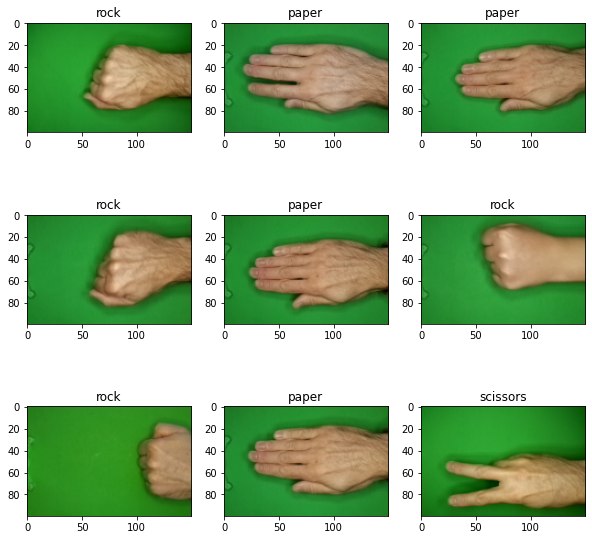

In [82]:
#menampilkan data rps_train
plt.figure(figsize=(10, 10))
for images, labels in rps_train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])


# Standarisasi data

In [76]:
#Rescaling
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

# Training dataset


In [83]:
num_classes = 3

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [90]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [91]:
model.fit(
  rps_train,
  validation_data=rps_val,
  epochs=3
)

Epoch 1/3
55/55 [==============================] - 31s 551ms/step - loss: 0.0976 - accuracy: 0.9673 - val_loss: 0.1291 - val_accuracy: 0.9519
Epoch 2/3
55/55 [==============================] - 31s 549ms/step - loss: 0.0571 - accuracy: 0.9803 - val_loss: 0.0787 - val_accuracy: 0.9771
Epoch 3/3
55/55 [==============================] - 31s 548ms/step - loss: 0.0618 - accuracy: 0.9813 - val_loss: 0.1114 - val_accuracy: 0.9725


Saving 0NDYNEoDui7o64gU.png to 0NDYNEoDui7o64gU (3).png
0NDYNEoDui7o64gU.png


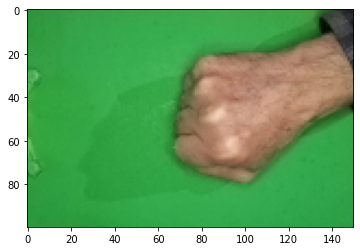

In [97]:
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=120)
  
  print(fn)